## 시계열 데이터 시각화 기법 소개

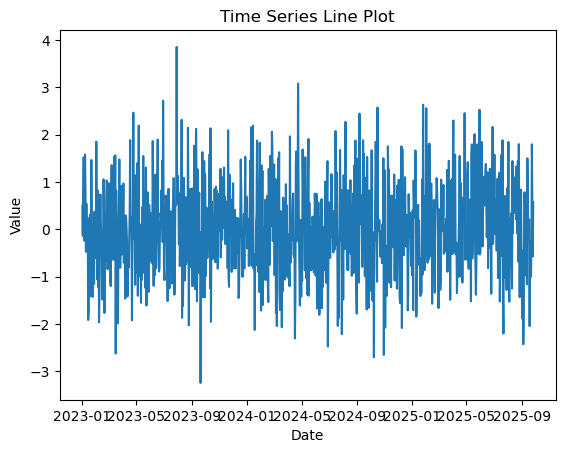

In [3]:
# 선 그래프
# 시간이 x축, 데이터 값이 y축

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start = '2023-01-01', periods =1000, freq = 'D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date' : dates, 'Values' : values})

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Values'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Line Plot')
plt.show()

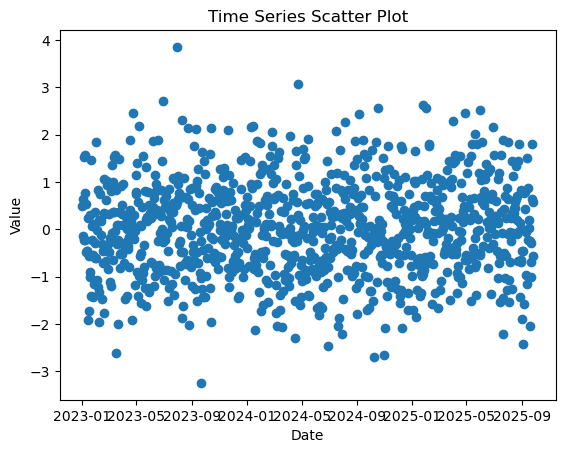

In [4]:
# 산점도 그래프

plt.scatter(data['Date'], data['Values'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Scatter Plot')
plt.show()

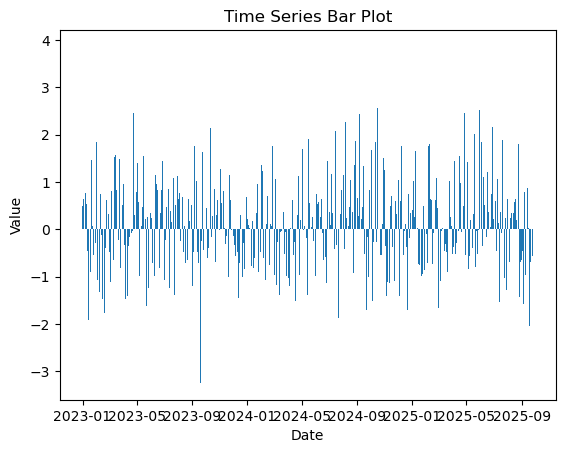

In [21]:
# 막대 그래프
plt.bar(data['Date'], data['Values'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Plot')
plt.show()

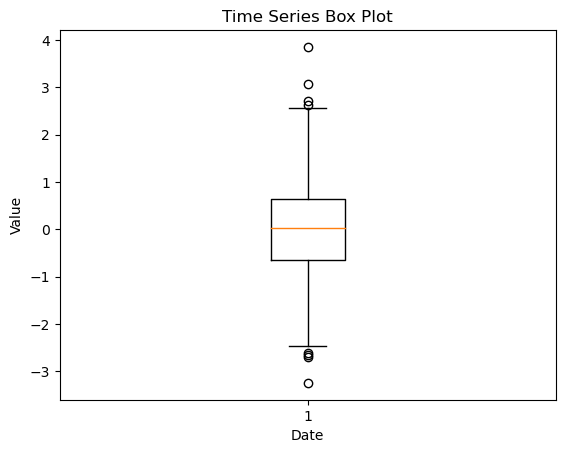

In [5]:
# 박스 플롯
plt.boxplot(data['Values'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Box Plot')
plt.show()

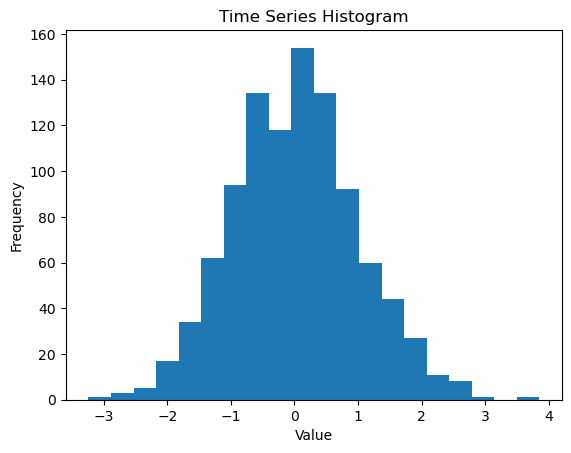

In [6]:
# 히스토그램
plt.hist(data['Values'], bins = 20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Time Series Histogram')
plt.show()

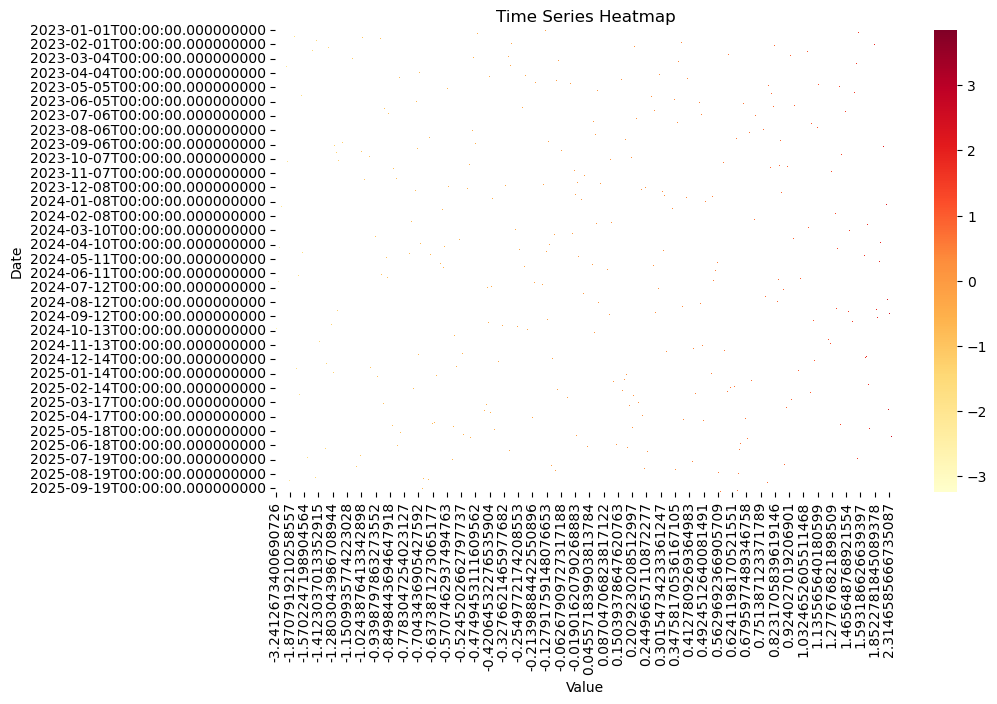

In [14]:
import seaborn as sns

# 데이터를 피봇 테이블로 변환
pivot_table = data.pivot(index = 'Date', columns = 'Values', values = 'Values')

# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar=True)
plt.xlabel('Value')
plt.ylabel('Date')
plt.title('Time Series Heatmap')
plt.show()

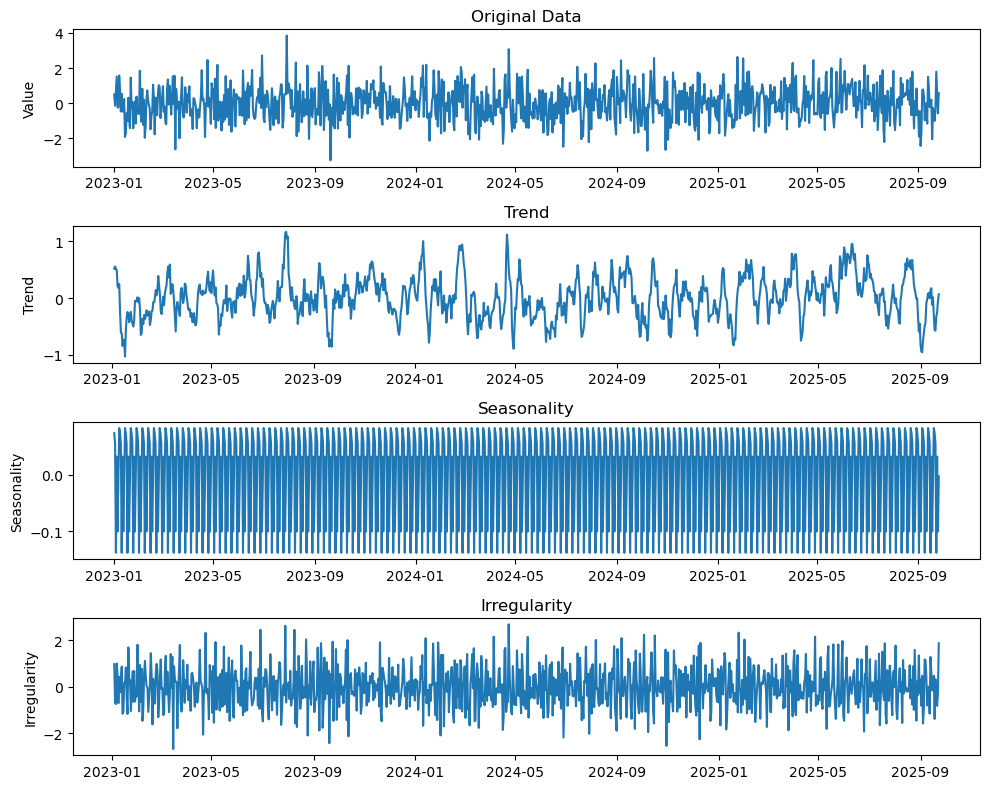

In [20]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
result = seasonal_decompose(data['Values'], model='additive', period=7)

# 분해 결과 시각화
plt.figure(figsize=(10,8))

# 원본 데이터
plt.subplot(4, 1, 1)
plt.plot(data['Date'], data['Values'])
plt.title('Original Data')
plt.ylabel('Value')

# 추세(Trend)
plt.subplot(4, 1, 2)
plt.plot(data['Date'], result.trend)
plt.title('Trend')
plt.ylabel('Trend')

# 추세(Trend)
plt.subplot(4, 1, 3)
plt.plot(data['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

# 불규칙성(Irregularity)
plt.subplot(4, 1, 4)
plt.plot(data['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()